In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

dtypes = {'auction_type_id':'int8','country':'int64','device_id':'int64','platform':'category','ref_type_id':'category','source_id':'category'}
cols = ['country','date','device_id','platform','ref_type_id','source_id']
events = pd.read_csv(r'C:\Users\Matias\Documents\UBA\Datos\auctions.csv.gzip', compression = 'gzip', usecols = cols, dtype = dtypes)

In [54]:
events['date'] = pd.to_datetime(events['date'])
#events.info()

In [55]:
#events.head()

In [7]:
events['auction_count_value'] = 1
events['auction_count_value'] = events['auction_count_value'].astype('int32')

In [8]:
byDevice = events.groupby('device_id').agg({'auction_count_value':'sum'})
byDevice = byDevice.nlargest(5,'auction_count_value')
byDevice.head()

,auction_count_value
device_id,
633139769114048761,27762
7202276635029175071,23055
7298861376107043945,18188
6302840482782120473,16400
5376802567578262905,16367


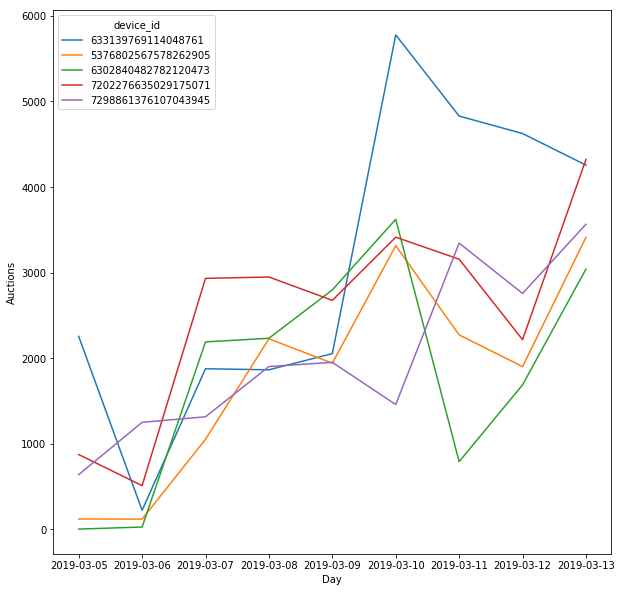

In [70]:
#conseguir los registros de los id en el top 5
#https://stackoverflow.com/questions/48304854/pandas-filter-method-with-lambda-function
top5events = events[events['device_id'].isin(byDevice.index.tolist())]

#agrego index date para organizar por dia
top5events = top5events.set_index('date')
top5events['day'] = top5events.index.date
top5events = top5events.groupby(['day','device_id']).agg({'auction_count_value':'sum'}).unstack()#unstack metodo magico

#agarrar solo las columnas del nivel 1 del multindex
top5events.columns = top5events.columns.get_level_values(1)

#graficar
ax = top5events.plot(figsize= (10,10))
ax.set_xlabel("Day")
ax.set_ylabel("Auctions")
ax

Index(['auction_count_value', 'auction_count_value', 'auction_count_value',
       'auction_count_value', 'auction_count_value'],
      dtype='object')